In [1]:
what_were_covering = {1: "data (preparation and load)", 
                        2: "buld model",
                        3: "fitting the model to data (training)",
                        4: "making prediction and evaluating a model (inference)",
                        5: "saving and loading a model",
                        6: "putting it all together"
}

In [2]:
what_were_covering

{1: 'data (preparation and load)',
 2: 'buld model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
print(torch.__version__)
print(torch.version.cuda)

/home/mahfuz/anaconda3/envs/dl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.13.0
11.7


### Data (preparation and loading)

In [4]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### Split data into training and test sets

In [5]:
# create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing set
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [8]:
def plot_predictions(train_data=X_train, 
                     train_labels = y_train, 
                     test_data=X_test, 
                     test_labels=y_test,
                     predictions = None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 6))

    # plot training data in blue
    plt.scatter(train_data,train_labels, c='b',s=4, label='Training data')

    # plot test data in green
    plt.scatter(test_data,test_labels, c='r',s=4, label='Test data')

    if predictions is not None:
        # plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c='r', s=4, label='predictions')

    # show the legend
    plt.legend(prop={'size': 10})
    plt.show()


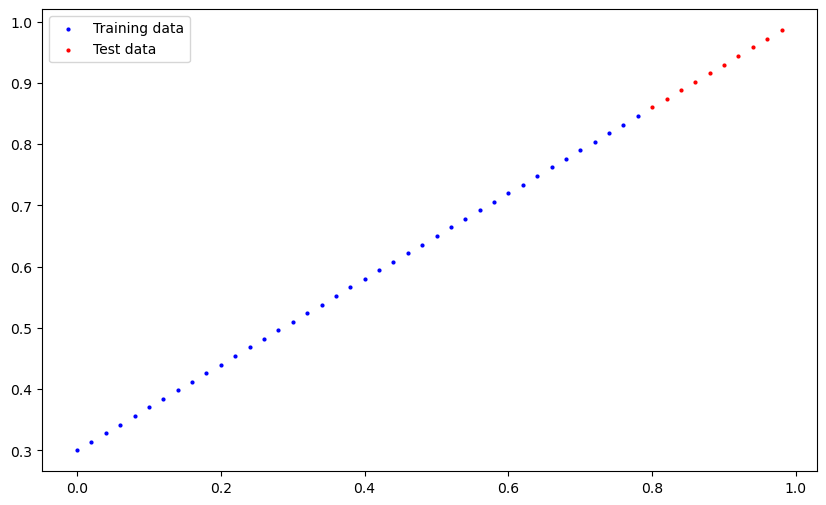

In [9]:
plot_predictions()

## Build model

In [10]:
# create a Liner Regresing model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                 requires_grad=True)
        
    # forward defines the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights*X + self.bias

#### Checking the contents of PyTorch model

In [11]:
# set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

"""
Create an instance of te model
(this is a sub class of nn.Module that contains nn.Parameter(s))
"""
model_0 = LinearRegressionModel()

# check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model 
contains) of the model using ```.state_dict()```.

In [12]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Making predictions using ```torch.inference_mode()```

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [16]:
# make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

print(len(y_preds))

50


In [15]:
# check the prediction
print(f"Number of the testing samples: {len(X_test)}")
print(f"Number of the predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of the testing samples: 10
Number of the predictions made: 50
Predicted values:
tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894],
        [0.1961],
        [0.2029],
        [0.2096],
        [0.2163],
        [0.2231],
        [0.2298],
        [0.2366],
        [0.2433],
        [0.2500],
        [0.2568],
        [0.2635],
        [0.2702],
        [0.2770],
        [0.2837],
        [0.2904],
        [0.2972],
        [0.3039],
        [0.3106],
        [0.3174],
        [0.3241],
        [0.3308],
        [0.3376],
        [0.3443],
        [0.3510],
        [0.3578],
        [0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [ ]:
plot_predictions(predictions=y_preds)